Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset_path = "DS_ML Coding Challenge Dataset.xlsx"

training_dataset = pd.read_excel(dataset_path,sheet_name="Training Dataset")
test_dataset = pd.read_excel(dataset_path, sheet_name="Test Dataset")

Data Analysis

Analyzing the numerical values 

In [3]:
# Analyze test data 
print(test_dataset.dtypes)
print(test_dataset.isnull().sum())

ProductType                  object
Manufacturer                 object
Area Code                    object
Sourcing Channel             object
Product Size                 object
Product Type                 object
Month of Sourcing    datetime64[ns]
Sourcing Cost               float64
dtype: object
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


In [4]:
# Analyze training data
print(training_dataset.dtypes)
print(training_dataset.isnull().sum())

ProductType                  object
Manufacturer                 object
Area Code                    object
Sourcing Channel             object
Product Size                 object
Product Type                 object
Month of Sourcing    datetime64[ns]
Sourcing Cost               float64
dtype: object
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


From this we can conclude that there are no missing values in the training or testing dataset.

In [5]:
# Display summary statistics for numerical features
train_stats = training_dataset.describe()
print(train_stats)

                   Month of Sourcing  Sourcing Cost
count                         550176  550176.000000
mean   2020-12-08 10:27:28.769848576     108.816793
min              2020-07-01 00:00:00    -196.070000
25%              2020-10-01 00:00:00      57.000000
50%              2020-12-01 00:00:00     132.000000
75%              2021-03-01 00:00:00     146.147000
max              2021-05-01 00:00:00   32632.500000
std                              NaN     104.390097


The minimum of sourcing cost in training dataset is negative so further investigation is required to check for outliers

In [6]:
# Display summary statistics for numerical features
test_stats = test_dataset.describe()
print(test_stats)

         Month of Sourcing  Sourcing Cost
count                   96      96.000000
mean   2021-06-21 00:00:00     106.208021
min    2021-06-21 00:00:00       4.140000
25%    2021-06-21 00:00:00      59.662500
50%    2021-06-21 00:00:00     117.245000
75%    2021-06-21 00:00:00     144.915000
max    2021-06-21 00:00:00     234.710000
std                    NaN      52.359484


There are no negative values in the test dataset

Finding the unique combinations

In [7]:
# Group by relevant columns
unique_counts = training_dataset.groupby(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']).size()

# Print the unique combinations and their counts
print(unique_counts)

ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  Product Type
NTM1         X1            A1         DIRECT            Small         Powder          12676
                           A10        DIRECT            Large         Powder           5758
                                      ECOM              Large         Powder           2320
                           A11        DIRECT            Large         Powder          12098
                           A2         DIRECT            Large         Powder           4295
                                                                                      ...  
NTM3         X1            A44        DIRECT            Small         Liquid          10656
                           A8         DIRECT            Large         Powder           5620
                                                        Small         Powder           1814
             X2            A20        DIRECT            Large         Powder           21

In [8]:
# Group by relevant columns
unique_counts = test_dataset.groupby(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']).size()

# Print the unique combinations and their counts
print(unique_counts)

ProductType  Manufacturer  Area Code  Sourcing Channel  Product Size  Product Type
NTM1         X1            A1         DIRECT            Small         Powder          1
                           A10        DIRECT            Large         Powder          1
                                      ECOM              Large         Powder          1
                           A11        DIRECT            Large         Powder          1
                           A2         DIRECT            Large         Powder          1
                                                                                     ..
NTM3         X1            A44        DIRECT            Small         Liquid          1
                           A8         DIRECT            Large         Powder          1
                                                        Small         Powder          1
             X2            A20        DIRECT            Large         Powder          1
             X3            A22       

Visualising the Ditribution

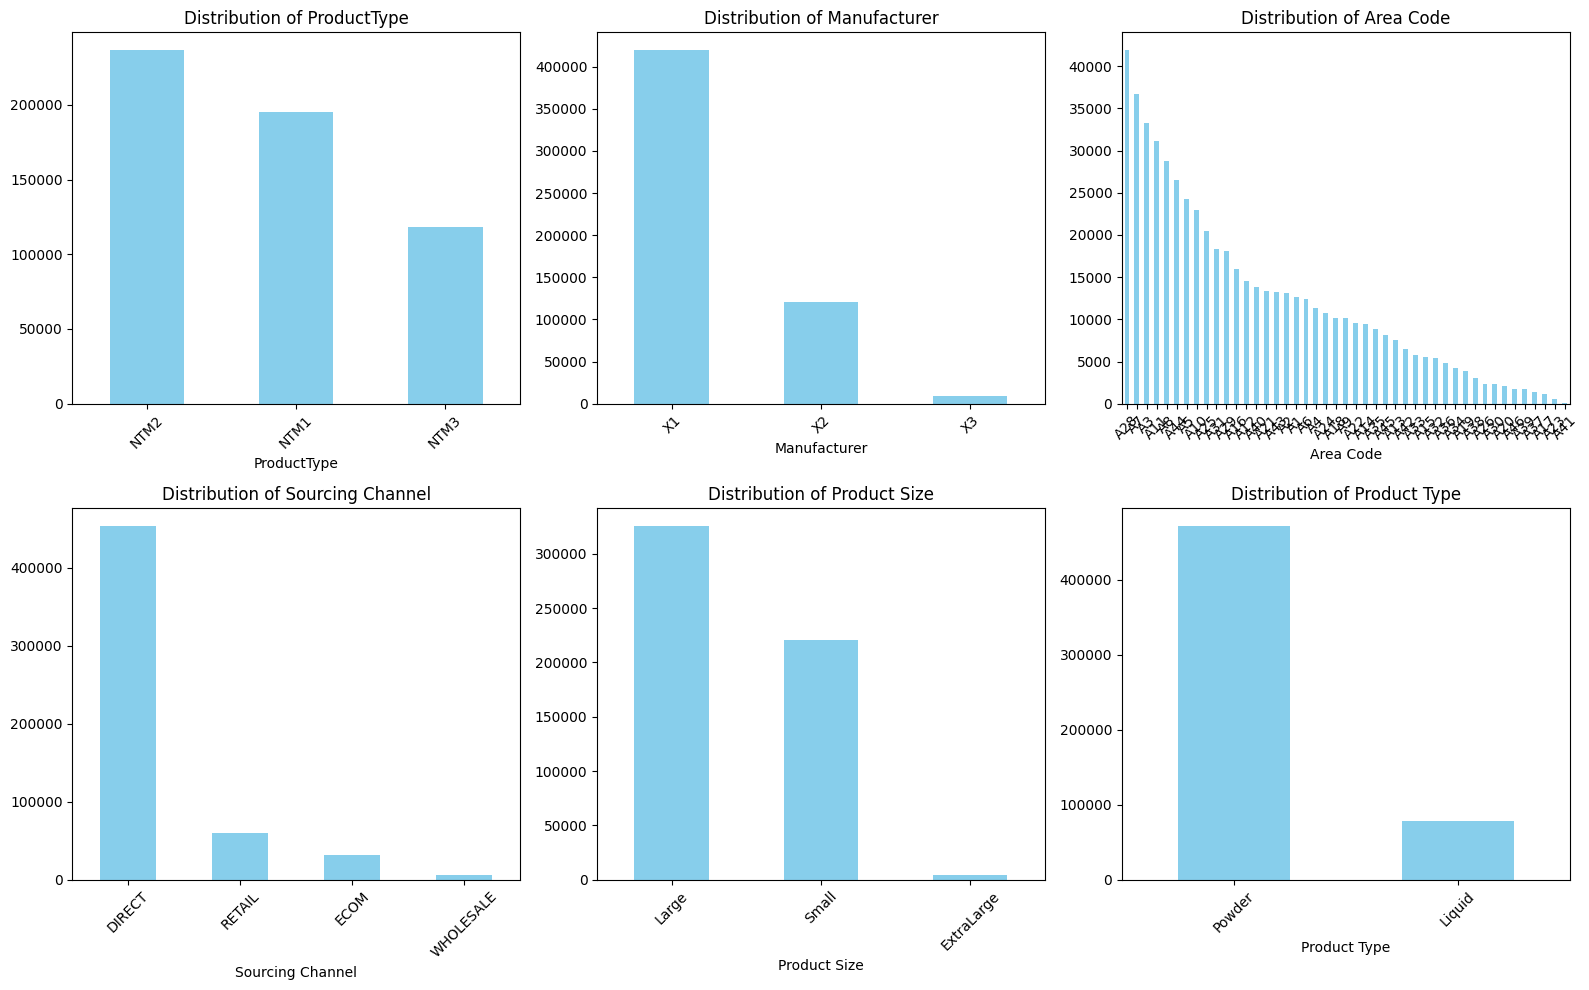

In [9]:
# Define categorical columns
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']

# Create subplots for count plots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Iterate through each categorical column
for i, col in enumerate(categorical_cols):
    # Calculate subplot index
    row_index = i // 3
    col_index = i % 3
    
    # Plot count plot for current categorical column
    ax = axes[row_index, col_index]
    training_dataset[col].value_counts().plot(kind='bar', ax=ax, color='skyblue')
    
    # Set title and rotate x-axis labels
    ax.set_title(f'Distribution of {col}')
    ax.tick_params(axis='x', rotation=45)
    
# Adjust layout and show plot
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

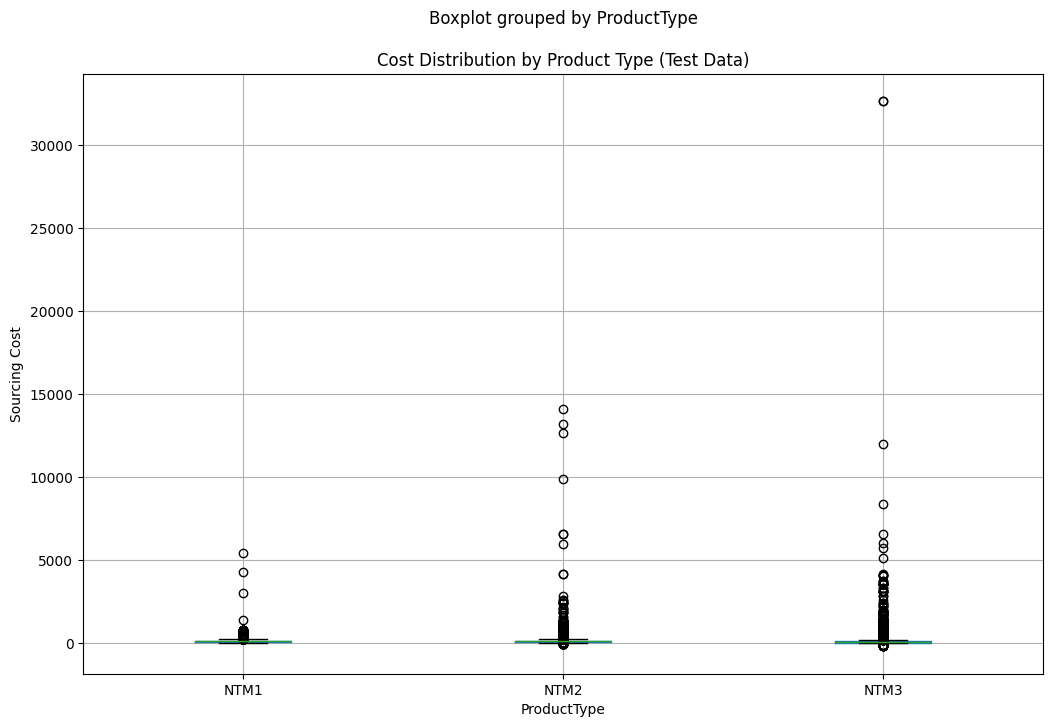

<Figure size 1200x800 with 0 Axes>

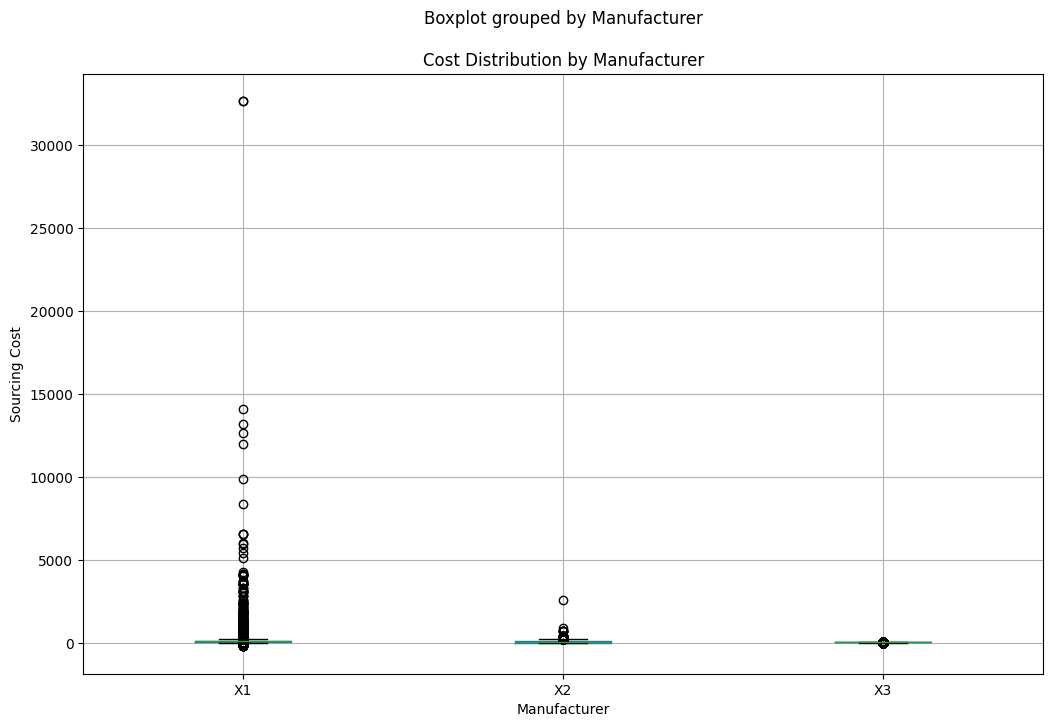

In [10]:
plt.figure(figsize=(12, 8))
training_dataset.boxplot(column='Sourcing Cost', by='ProductType', figsize=(12, 8))
plt.title('Cost Distribution by Product Type (Test Data)')
plt.ylabel('Sourcing Cost')
plt.show()

plt.figure(figsize=(12, 8))
training_dataset.boxplot(column='Sourcing Cost', by='Manufacturer', figsize=(12, 8))
plt.title('Cost Distribution by Manufacturer')
plt.ylabel('Sourcing Cost')
plt.show()

Correlation Matrix

                                                                                                 Month of Sourcing  \
ProductType Manufacturer Area Code Sourcing Channel Product Size Product Type                                        
NTM1        X1           A1        DIRECT           Small        Powder       Month of Sourcing           1.000000   
                                                                              Sourcing Cost               0.036488   
                         A10       DIRECT           Large        Powder       Month of Sourcing           1.000000   
                                                                              Sourcing Cost               0.393346   
                                   ECOM             Large        Powder       Month of Sourcing           1.000000   
...                                                                                                            ...   
NTM3        X1           A8        DIRECT           Smal

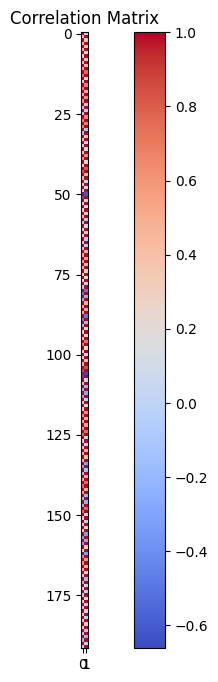

In [11]:
correlation_matrix = training_dataset.groupby(['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']).corr()
print(correlation_matrix)

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

Test Data Insights

<Figure size 1200x800 with 0 Axes>

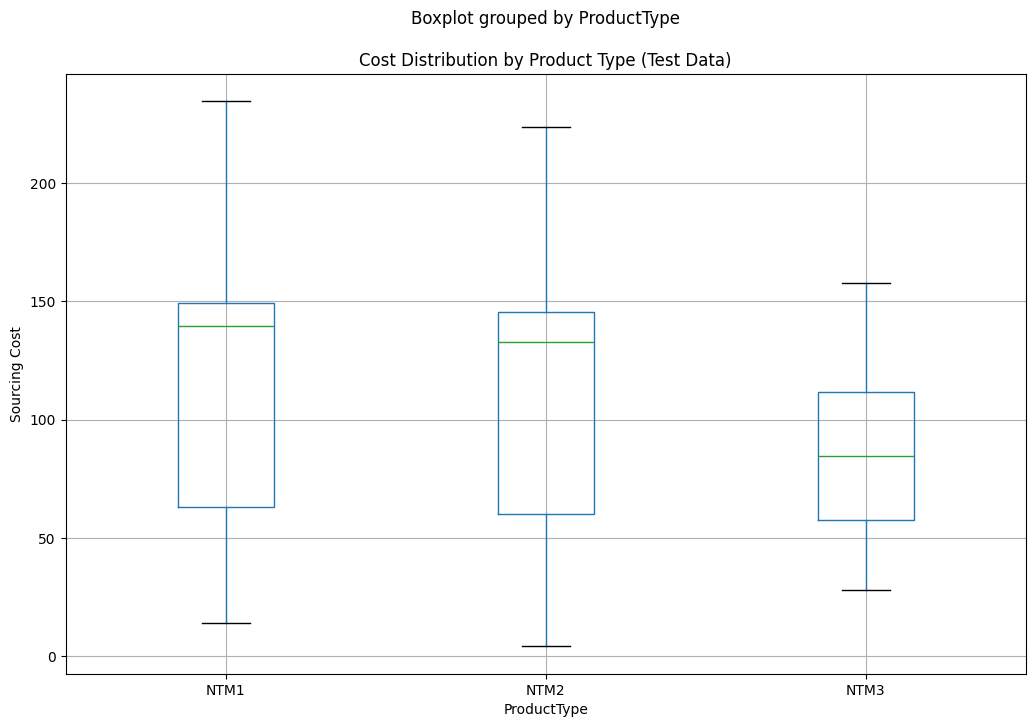

In [12]:
plt.figure(figsize=(12, 8))
test_dataset.boxplot(column='Sourcing Cost', by='ProductType', figsize=(12, 8))
plt.title('Cost Distribution by Product Type (Test Data)')
plt.ylabel('Sourcing Cost')
plt.show()

Checking number of duplicate rows

In [13]:
# Check for duplicates in the dataset
duplicate_rows = training_dataset[training_dataset.duplicated()]
print("\nNumber of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 541165


Investigating negative values

In [14]:
# Filter entries with negative sourcing costs
negative_costs_df = training_dataset[training_dataset['Sourcing Cost'] < 0]

# Explore the characteristics of entries with negative costs
print("Number of entries with negative sourcing costs:", len(negative_costs_df))

Number of entries with negative sourcing costs: 2231


In [15]:
# Investigate patterns based on different attributes

negative_costs_by_product_type = negative_costs_df.groupby('ProductType')['Sourcing Cost'].count()
print("\nDistribution of negative costs by ProductType:")
print(negative_costs_by_product_type)

negative_costs_by_manufacturer = negative_costs_df.groupby('Manufacturer')['Sourcing Cost'].count()
print("\nDistribution of negative costs by Manufacturer:")
print(negative_costs_by_manufacturer)

negative_costs_by_sourcing = negative_costs_df.groupby('Sourcing Channel')['Sourcing Cost'].count()
print("\nDistribution of negative costs by Sourcing Channel:")
print(negative_costs_by_sourcing)

# Explore temporal patterns by analyzing negative costs over time
negative_costs_by_month = negative_costs_df.groupby(pd.Grouper(key='Month of Sourcing', freq='ME'))['Sourcing Cost'].count()
print("\nDistribution of negative costs by Month of Sourcing:")
print(negative_costs_by_month)


Distribution of negative costs by ProductType:
ProductType
NTM1    390
NTM2    955
NTM3    886
Name: Sourcing Cost, dtype: int64

Distribution of negative costs by Manufacturer:
Manufacturer
X1    1030
X2    1201
Name: Sourcing Cost, dtype: int64

Distribution of negative costs by Sourcing Channel:
Sourcing Channel
DIRECT    1901
RETAIL     330
Name: Sourcing Cost, dtype: int64

Distribution of negative costs by Month of Sourcing:
Month of Sourcing
2020-07-31    126
2020-08-31    159
2020-09-30    544
2020-10-31     96
2020-11-30    242
2020-12-31     80
2021-01-31    144
2021-02-28    243
2021-03-31    130
2021-04-30    336
2021-05-31    131
Freq: ME, Name: Sourcing Cost, dtype: int64


Preprocessing

In [16]:
# Create a copy of the original dataset
cleaned_df = training_dataset.copy()

# Handling negative values
# cleaned_df['Sourcing Cost'] = cleaned_df['Sourcing Cost'].apply(lambda x: np.nan if x < 0 else x)

# Removing duplicate rows
# cleaned_df = cleaned_df.drop_duplicates()

# Check the number of remaining rows after removing duplicates
# print("Number of rows after removing duplicates:", len(cleaned_df))

In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define categorical and numerical features
categorical_features = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
numerical_features = ['Sourcing Cost']

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Use one-hot encoding for categorical features
])

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Use standardization for numerical features
])

# Combine preprocessing steps for both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

# Preprocess the training data
X_train = cleaned_df.drop(columns=['Month of Sourcing']) # Drop the date feature if not needed
y_train = cleaned_df['Sourcing Cost']
X_train_processed = preprocessor.fit_transform(X_train)

test_data = test_dataset.copy()

# Preprocess the testing data
X_test = test_data.drop(columns=['Month of Sourcing']) # Drop the date feature if not needed
y_test = test_data['Sourcing Cost']
X_test_processed = preprocessor.transform(X_test)

Model Training

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_processed, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train_processed)

# Make predictions on the test set
test_predictions = model.predict(X_test_processed)

# Evaluate the model
train_mae = mean_absolute_error(y_train, train_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Training MAE:", train_mae)
print("Testing MAE:", test_mae)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

Training MAE: 0.00025344552398065795
Testing MAE: 0.0004561923188100281
Training MSE: 1.678755466253992e-07
Testing MSE: 8.68226742963138e-07


In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Define Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train_processed, y_train)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on training and testing data
train_mae = mean_absolute_error(y_train, best_rf_model.predict(X_train_processed))
test_mae = mean_absolute_error(y_test, best_rf_model.predict(X_test_processed))

print("Optimized Random Forest Model:")
print(f"Training MAE: {train_mae}")
print(f"Testing MAE: {test_mae}")